In [1]:
#1. 생존자 예측 인공프로그램으로만들어 보자.

In [2]:
#2. 데이터 수집(excel)

In [3]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
raw_data = pd.read_excel('data/titanic.xls')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [6]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [7]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


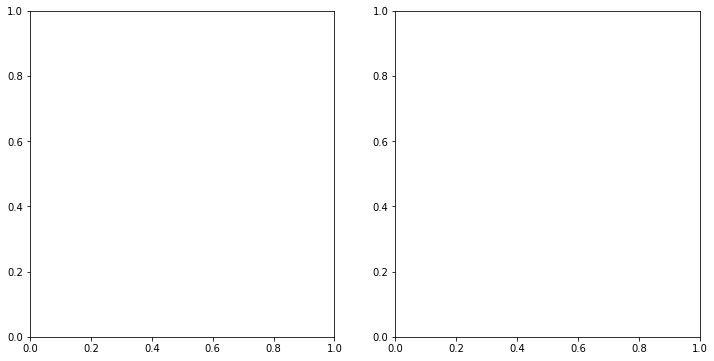

In [41]:
f,ax=plt.subplots(1,2,figsize=(12,6))

In [9]:
raw_data['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

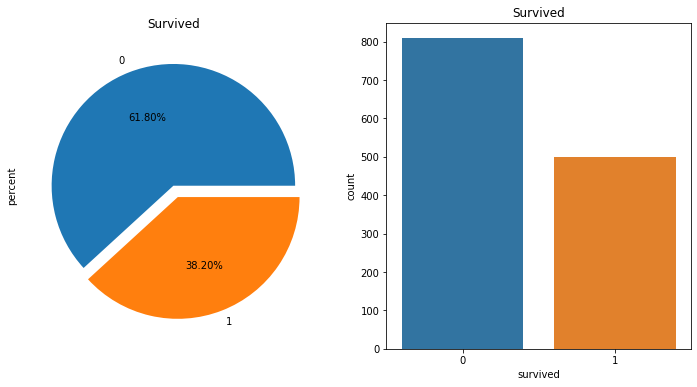

In [10]:
f,ax=plt.subplots(1,2,figsize=(12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],
                                             autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('percent')

sns.countplot('survived', data=raw_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

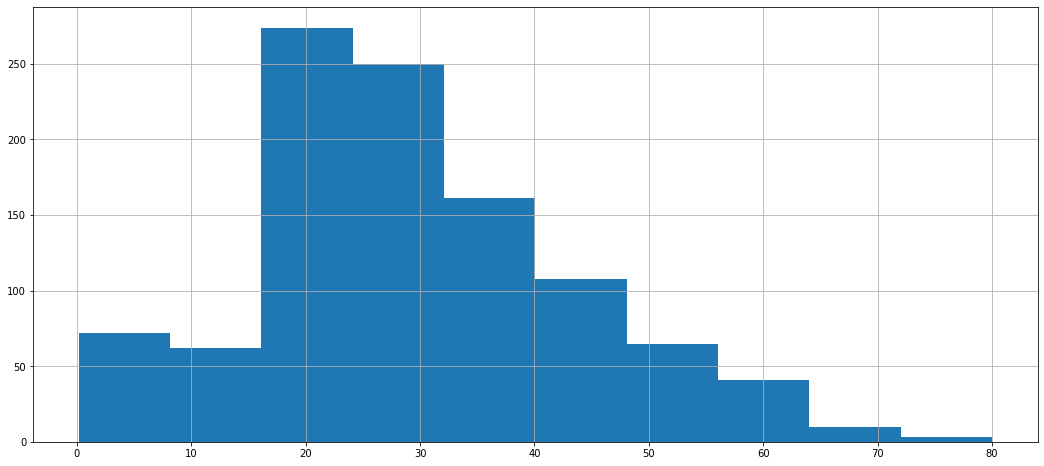

In [11]:
raw_data['age'].hist(bins=10, figsize=(18,8))

In [12]:
raw_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [13]:
raw_data.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


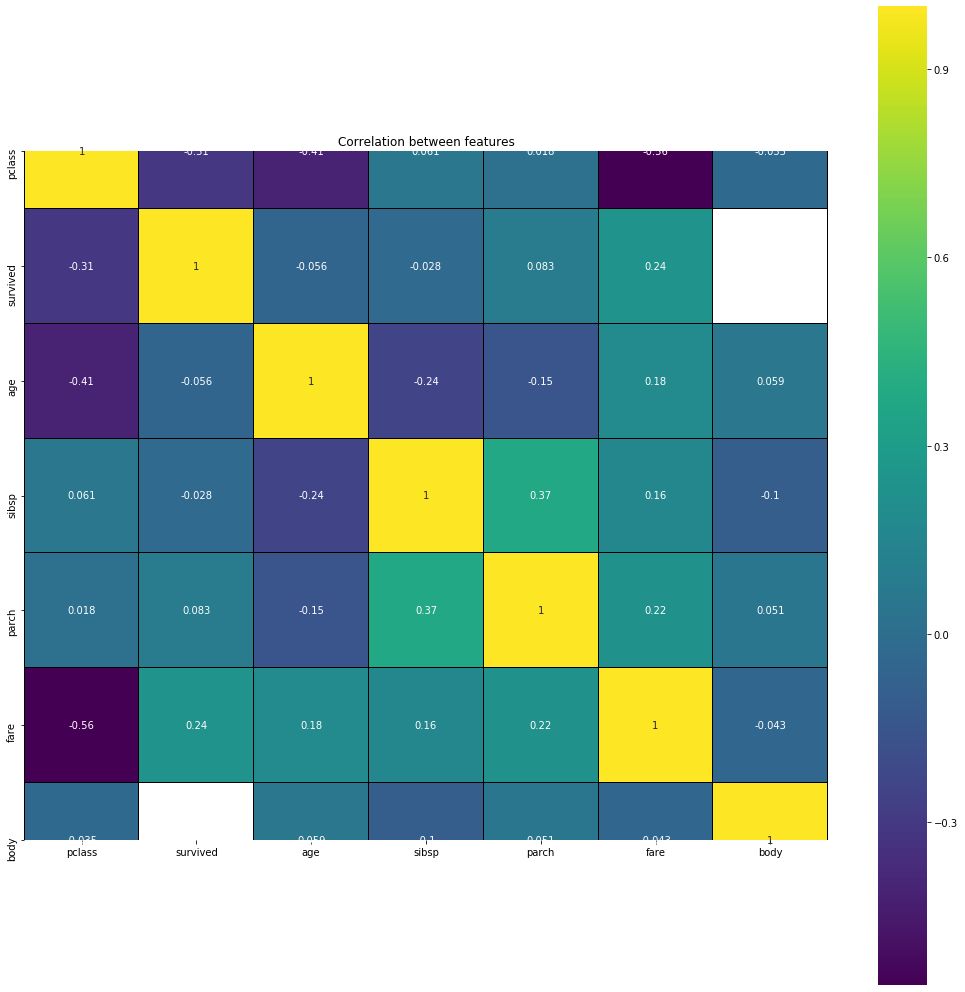

In [14]:
plt.figure(figsize=(18, 18))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="black")
plt.title('Correlation between features')
plt.show()

In [15]:
raw_data['age_cat'] = pd.cut(
                        raw_data['age'],
                        bins=[0, 3, 7, 15, 30, 60, 100],
                        include_lowest=True,
                         labels=['baby', 'children', 'teenage', 
                                     'young', 'adult', 'old'])

raw_data['age_cat']

0         young
1          baby
2          baby
3         young
4         young
         ...   
1304    teenage
1305        NaN
1306      young
1307      young
1308      young
Name: age_cat, Length: 1309, dtype: category
Categories (6, object): [baby < children < teenage < young < adult < old]

In [16]:
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,young
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,young


In [17]:
# age_cat으로 그룹을 지어서, 평균을 내보세요.
raw_data.groupby('age_cat').mean()

,pclass,survived,age,sibsp,parch,fare,body
age_cat,,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346,4.000000
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828,NaN
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904,132.000000
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140,169.720930
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986,154.777778
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309,185.600000


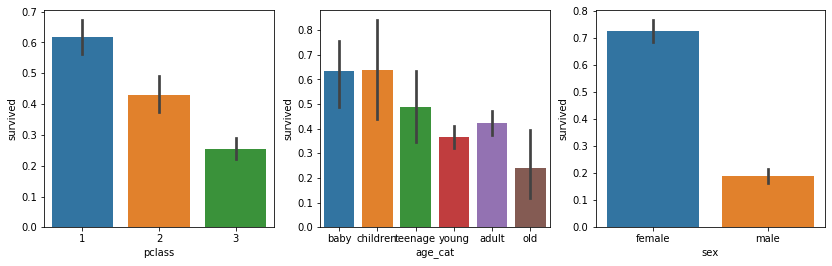

In [18]:
plt.figure(figsize=[14,4])
plt.subplot(131)
sns.barplot('pclass', 'survived', data=raw_data) #평균을 가지고 막대그래프 그림

#age_cat, sex
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=raw_data)

plt.subplot(133)
sns.barplot('sex', 'survived', data=raw_data)

plt.show()

In [19]:
boat_survivors = raw_data[raw_data['boat'].notnull()]

In [20]:
boat_survivors

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,3,1,"Turja, Miss. Anna Sofia",female,18.0000,0,0,4138,9.8417,NaN,S,15,NaN,NaN,young
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0000,0,0,4134,9.5875,NaN,S,15,NaN,NaN,old
1277,3,1,"Vartanian, Mr. David",male,22.0000,0,0,2658,7.2250,NaN,C,13 15,NaN,NaN,young
1286,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0000,0,0,2688,7.2292,NaN,C,C,NaN,NaN,adult


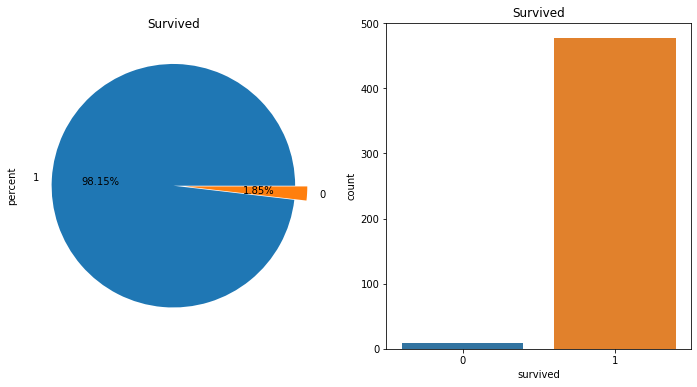

In [21]:
f,ax=plt.subplots(1,2,figsize=(12,6))

boat_survivors['survived'].value_counts().plot.pie(explode=[0,0.1],
                                             autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('percent')

sns.countplot('survived', data=boat_survivors,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [22]:
train_pre = raw_data[['survived','pclass','sex','age','sibsp','parch','fare']]
train_pre.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,1,1,female,29.0000,0,0,211.3375
1,1,1,male,0.9167,1,2,151.5500
2,0,1,female,2.0000,1,2,151.5500
3,0,1,male,30.0000,1,2,151.5500
4,0,1,female,25.0000,1,2,151.5500


In [23]:
train_pre = train_pre[train_pre['age'].notnull()]
train_pre = train_pre[train_pre['sibsp'].notnull()]
train_pre= train_pre[train_pre['parch'].notnull()]
train_pre = train_pre[train_pre['fare'].notnull()]
train_pre = train_pre[train_pre['sex'].notnull()]
train_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 7 columns):
survived    1045 non-null int64
pclass      1045 non-null int64
sex         1045 non-null object
age         1045 non-null float64
sibsp       1045 non-null int64
parch       1045 non-null int64
fare        1045 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 65.3+ KB


In [24]:
train_pre = train_pre[train_pre['sex'].notnull()]

In [25]:
tmp = []
for each in train_pre['sex']:
    if each == 'female':
        tmp.append(0)
    elif each == 'male':
        tmp.append(1)
    else:
        tmp.append(np.nan)

In [26]:
train_pre['sex'] = tmp
train_pre.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,1,1,0,29.0000,0,0,211.3375
1,1,1,1,0.9167,1,2,151.5500
2,0,1,0,2.0000,1,2,151.5500
3,0,1,1,30.0000,1,2,151.5500
4,0,1,0,25.0000,1,2,151.5500


In [27]:
train_pre['pclass'] = train_pre['pclass'].astype('float')
train_pre['sex'] = train_pre['sex'].astype('float')
train_pre['sibsp'] = train_pre['sibsp'].astype('float')
train_pre['parch'] = train_pre['parch'].astype('float')
train_pre['fare'] = train_pre['fare'].astype('float')
train_pre['survied'] = train_pre['survived'].astype('float')
train_pre.head()

,survived,pclass,sex,age,sibsp,parch,fare,survied
0,1,1.0,0.0,29.0000,0.0,0.0,211.3375,1.0
1,1,1.0,1.0,0.9167,1.0,2.0,151.5500,1.0
2,0,1.0,0.0,2.0000,1.0,2.0,151.5500,0.0
3,0,1.0,1.0,30.0000,1.0,2.0,151.5500,0.0
4,0,1.0,0.0,25.0000,1.0,2.0,151.5500,0.0


In [28]:
train_pre2 = train_pre[['pclass','sex','age','sibsp','parch','fare']]
train_pre2.head()

,pclass,sex,age,sibsp,parch,fare
0,1.0,0.0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,0.9167,1.0,2.0,151.5500
2,1.0,0.0,2.0000,1.0,2.0,151.5500
3,1.0,1.0,30.0000,1.0,2.0,151.5500
4,1.0,0.0,25.0000,1.0,2.0,151.5500


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_pre2, 
                                                    train_pre[['survied']], 
                                                    test_size=0.1, 
                                                    random_state=13)

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 6 columns):
pclass    940 non-null float64
sex       940 non-null float64
age       940 non-null float64
sibsp     940 non-null float64
parch     940 non-null float64
fare      940 non-null float64
dtypes: float64(6)
memory usage: 51.4 KB


In [31]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 699 to 1057
Data columns (total 6 columns):
pclass    105 non-null float64
sex       105 non-null float64
age       105 non-null float64
sibsp     105 non-null float64
parch     105 non-null float64
fare      105 non-null float64
dtypes: float64(6)
memory usage: 5.7 KB


In [32]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 1 columns):
survied    940 non-null float64
dtypes: float64(1)
memory usage: 14.7 KB


In [33]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 699 to 1057
Data columns (total 1 columns):
survied    105 non-null float64
dtypes: float64(1)
memory usage: 1.6 KB


In [34]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare
710,3.0,0.0,37.0,0.0,0.0,7.7500
423,2.0,1.0,34.0,0.0,0.0,13.0000
646,3.0,0.0,38.0,1.0,5.0,31.3875
596,2.0,1.0,31.0,0.0,0.0,13.0000
286,1.0,0.0,63.0,1.0,0.0,221.7792


In [35]:
X_train = X_train.reset_index()
X_train = X_train.drop(['index'], axis=1)

X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis=1)

In [36]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
tree_clf.fit(X_train, y_train)

print('Score: {}'.format(tree_clf.score(X_train, y_train)))

Score: 0.8117021276595745


In [37]:
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test)
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100)

Test Accuracy is  84.76190476190476


In [38]:
# pclass, sex, age, sibsp, parch, fare
dicaprio = [3., 1., 19., 0., 0., 5.]
winslet = [1., 0., 17., 1., 1., 100.]

In [39]:
tree_clf.predict_proba([winslet])

array([[0.02419355, 0.97580645]])

In [40]:
tree_clf.predict_proba([dicaprio])

array([[0.875, 0.125]])

In [42]:
from sklearn.tree import export_graphviz

In [43]:
export_graphviz(
    tree_clf,
    out_file='titanic.dot',
    feature_names=['pclass','sex','age','sibsp','parch','fare'],
    class_names=['Unsurvived','Survived'],
    rounded=True,
    filled=True
)

In [44]:
import graphviz

In [46]:
with open("titanic.dot") as f:
    dot_graph=f.read()
    dot = graphviz.Source(dot_graph)
    dot.format='png'
    dot.render(filename='titanic_tree',directory='images/decision_trees',cleanup=True)
    dot